In [47]:
import sys
import pandas as pd
import numpy as np
import math
from scipy.special import softmax
from scipy.optimize import minimize, LinearConstraint
from scipy.spatial.distance import braycurtis
import multiprocessing
from concurrent.futures import ProcessPoolExecutor, as_completed
from imports import *
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
# # adding Folder_2 to the system path
# sys.path.insert(0, r'C:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\code')
# # sys.path.insert(0, r'C:\Users\yuvald\Documents\Uni\סמסטר ב\workshop_microbiome\code')

from imports import  *

import social_model_class_v2
reload(social_model_class_v2)


<module 'social_model_class_v2' from 'c:\\Users\\tomer\\Desktop\\BSc\\year3\\sem B\\workshop_microbiome\\Milestone2\\social_model_class_v2.py'>

In [48]:
data_path = r"train_data.csv"
metadata_path = r"train_metadata.csv"

$$\Delta_t  \space windowing$$

In [49]:
model = social_model_class_v2.superModel(data_path, metadata_path)

np.all(model.metadata_df.index.isin(model.data_df.index))

c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class_v2.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return metadata_clean, data_clean


True

## cross validation (4 - fold)

In [44]:

baboons = model.baboons
dict_list = list(model.baboons.items())
np.random.shuffle(dict_list)
groups = [dict(group) for group in np.array_split(dict_list,4)]

data_df = pd.read_csv(data_path, index_col=0)
metadata_df = pd.read_csv(metadata_path, index_col=0)

for i in range(4):
    train_metatdata = metadata_df[~metadata_df["baboon_id"].isin(groups[i].keys())]
    train_data = data_df.loc[train_metatdata.index]
    known_metadata = metadata_df[metadata_df['baboon_id'].isin(groups[i].keys())]
    indicies = []
    for baboon in groups[i].values():
        indicies.extend(baboon.metadata_I.index[:10])

    known_data = data_df.loc[indicies]
    true_data = data_df.loc[known_metadata[~np.isin(known_metadata.index, indicies)].index]


    train_data.to_csv(fr".\cross_val_data\train_data_{i}.csv")
    train_metatdata.to_csv(fr".\cross_val_data\train_metadata_{i}.csv")
    known_data.to_csv(fr".\cross_val_data\known_data_{i}.csv")
    known_metadata.to_csv(fr".\cross_val_data\known_metadata_{i}.csv")
    true_data.to_csv(fr".\cross_val_data\true_data_{i}.csv")
    

In [45]:

baboons = model.baboons
dict_list = list(model.baboons.items())
np.random.shuffle(dict_list)
groups = [dict(group) for group in np.array_split(dict_list,4)]
metadata_df, data_df = social_model_class_v2.preprocessing(data_path, metadata_path)

for i in range(4):
    train_metatdata = metadata_df[~metadata_df["baboon_id"].isin(groups[i].keys())]
    train_data = data_df.loc[train_metatdata.index]
    known_metadata = metadata_df[metadata_df['baboon_id'].isin(groups[i].keys())]
    indicies = []
    for baboon in groups[i].values():
        indicies.extend(baboon.metadata_I.index[:10])

    known_data = data_df.loc[indicies]
    true_data = data_df.loc[known_metadata[~np.isin(known_metadata.index, indicies)].index]


    train_data.to_csv(fr".\cross_val_data\train_data_{i}.csv")
    train_metatdata.to_csv(fr".\cross_val_data\train_metadata_{i}.csv")
    known_data.to_csv(fr".\cross_val_data\known_data_{i}.csv")
    known_metadata.to_csv(fr".\cross_val_data\known_metadata_{i}.csv")
    true_data.to_csv(fr".\cross_val_data\true_data_{i}.csv")
    
for i in range(4):
    model = social_model_class_v2.superModel(fr".\cross_val_data\train_data_{i}.csv", fr".\cross_val_data\train_metadata_{i}.csv")
    model.alpha_ = np.array([0]*61)
    
    cpus = max(1, min(multiprocessing.cpu_count() - 2, len(model.baboons)))
    
       # with ProcessPoolExecutor(cpus) as executor:
    #     futures = [executor.submit(baboon.fit, model.alpha_) for baboon in model.baboons.values()]
    #     for future in as_completed(futures):
    #         pass
    for baboon in model.baboons.values():
        baboon.beta= np.random.rand(61)
    print(f"predicting {i}")

    model.add_new_data(fr".\cross_val_data\known_data_{i}.csv", fr".\cross_val_data\known_metadata_{i}.csv")

    print(f"new data added {i}")
    predictions_noniterative = model.predict(groups[i].keys(), iterative=False)
    predictions_iterative = model.predict(groups[i].keys(), iterative=True)
    predictions_noniterative.to_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv")
    predictions_iterative.to_csv(fr".\cross_val_data\predictions_iterative_{i}.csv")

c:\Users\tomer\Desktop\BSc\year3\sem B\workshop_microbiome\Milestone2\social_model_class_v2.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_clean['collection_date'] = pd.to_datetime(metadata_clean['collection_date'])


predicting 0
new data added 0


ValueError: Length of weights not compatible with specified axis.

In [43]:
groups[0]["Baboon_570"].metadata_I

,baboon_id,collection_date,sex,age,social_group,group_size,rain_month_mm,season,hydro_year,month,...,diet_PC4,diet_PC5,diet_PC6,diet_PC7,diet_PC8,diet_PC9,diet_PC10,diet_PC11,diet_PC12,diet_PC13
sample,,,,,,,,,,,,,,,,,,,,,
sample_11407-TAATCTCGCCGG-394,Baboon_570,2001-12-17,F,1.226557,g_1.22,36,3.6,wet,2002,12,...,-8.941594,4.557475,5.985504,12.593805,5.192222,2.275096,-15.447512,4.958335,0.570203,0.287248
sample_11413-CGGAGAGACATG-397,Baboon_570,2002-01-12,F,1.297741,g_1.22,37,24.0,wet,2002,1,...,-21.328939,3.874282,5.753159,13.717294,-4.901369,7.822852,7.330477,-1.961865,0.455705,0.462681
sample_12051-GGTCTTAGCACC-408,Baboon_570,2002-03-14,F,1.464750,g_1.22,37,36.6,wet,2002,3,...,2.251372,0.306900,-0.868001,-2.580339,13.591033,-0.139161,4.054595,1.956260,0.034840,-2.298080
sample_11412-ACGCATCGCACT-397,Baboon_570,2002-04-26,F,1.582478,g_1.22,36,56.8,wet,2002,4,...,5.473456,1.641514,-3.968846,-1.280779,-1.643338,1.990493,2.983272,-1.920254,-2.386399,-0.638064
sample_11408-CAAATCATTTCA-395,Baboon_570,2003-06-05,F,2.691307,g_1.22,44,46.4,dry,2003,6,...,-5.119064,7.139141,-6.290356,-5.011684,7.725099,6.737668,-3.890046,0.987506,0.928027,0.427708
sample_11408-ACGGACTGGCGC-395,Baboon_570,2003-06-09,F,2.702259,g_1.22,43,33.8,dry,2003,6,...,-5.119064,7.139141,-6.290356,-5.011684,7.725099,6.737668,-3.890046,0.987506,0.928027,0.427708
sample_12053-TGGGTCCCACAT-409,Baboon_570,2003-06-23,F,2.740589,g_1.22,45,8.8,dry,2003,6,...,2.622627,2.196365,6.338104,5.968159,-3.255047,-1.538468,-17.656959,3.137308,0.087628,-0.013121
sample_12051-TCCAGGGCTATA-408,Baboon_570,2003-07-22,F,2.819986,g_1.22,45,0.0,dry,2003,7,...,1.672794,-1.578694,2.761795,4.830616,-0.823302,-0.661164,-2.501454,0.127120,0.344493,-0.105453
sample_11413-AGAGTAAGCCGG-397,Baboon_570,2003-10-27,F,3.085558,g_1.22,44,0.0,dry,2003,10,...,-0.927354,-3.648718,2.229840,-3.358583,-2.273427,-1.438474,0.424773,0.160171,0.395934,-0.040311


KeyError: 'sample_11406-AATCTCTATAAC-394'

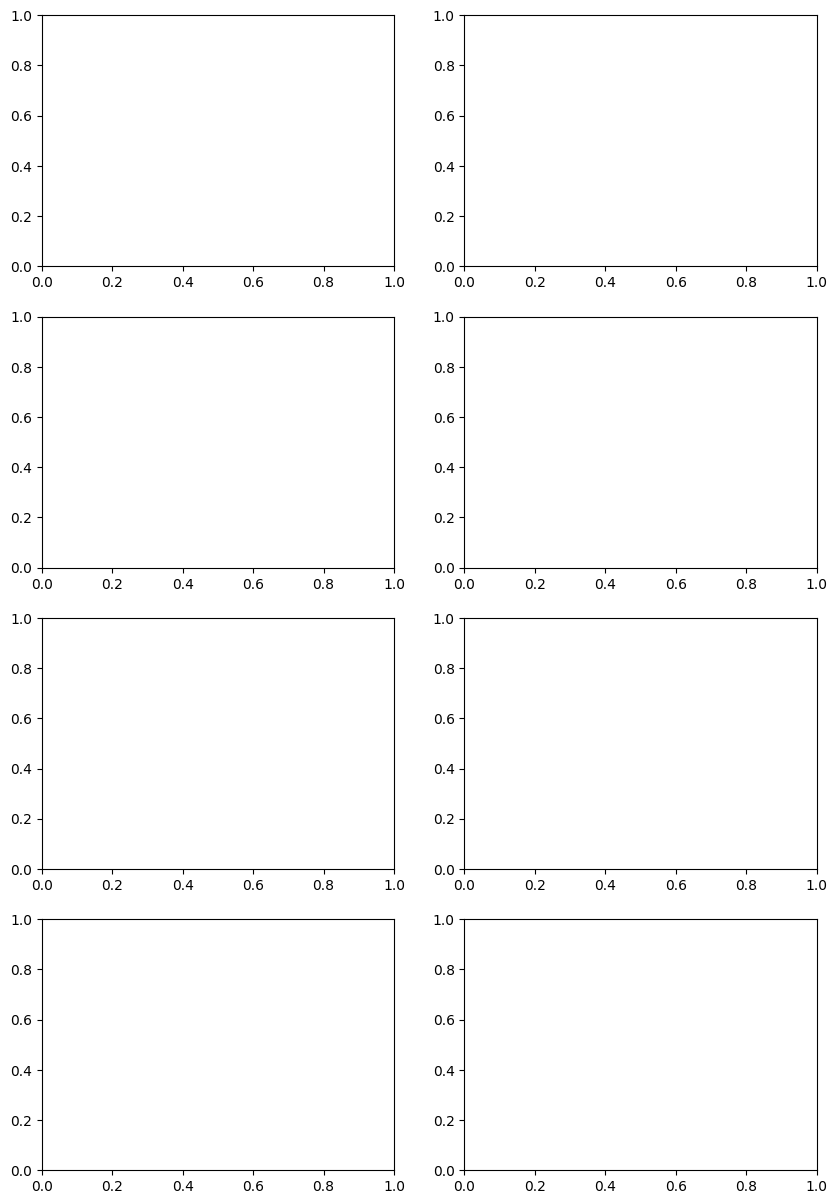

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

for i in range(4):
    # Load data
    predictions_noniterative = pd.read_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv", index_col=0)
    predictions_iterative = pd.read_csv(fr".\cross_val_data\predictions_iterative_{i}.csv", index_col=0)
    true_data = pd.read_csv(fr".\cross_val_data\true_data_{i}.csv", index_col=0)

    # Initialize lists to hold Bray-Curtis distances for each group
    bc_noniterative = []
    bc_iterative = []

    # Loop through each baboon
    for baboon in groups[i].keys():
        score_noniter =[] 
        score_iter =[]
        for idx in np.intersect1d(true_data.index, groups[i][baboon].metadata_I.index):
            
            # Calculate Bray-Curtis scores
            score_noniter.append(braycurtis(true_data.loc[idx], predictions_noniterative.loc[idx]))
            score_iter.append(braycurtis(true_data.loc[idx], predictions_iterative.loc[idx]))

            # Append the scores to respective lists
        bc_noniterative.append(np.mean(score_noniter))
        bc_iterative.append(np.mean(score_iter))

    # Plot KDE plots for both noniterative and iterative scores
    sns.kdeplot(bc_noniterative, ax=axes[i, 0], label="noniterative")
    sns.kdeplot(bc_iterative, ax=axes[i, 1], label="iterative")
    axes[i, 0].set_xlim(0, 1)
    axes[i, 1].set_xlim(0, 1)
    axes[i, 0].vlines(np.mean(bc_noniterative), 0, 10, color='red', linestyle='--')
    axes[i, 1].vlines(np.mean(bc_iterative), 0, 10, color='red', linestyle='--')

    # Set titles
    axes[i, 0].set_title(f"Non-iterative (Group {i+1}), mean={np.mean(bc_noniterative):.3f}")
    axes[i, 1].set_title(f"Iterative (Group {i+1}), mean={np.mean(bc_iterative):.3f}")

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
        
for i in range(4):
    # Load data
    predictions_noniterative = pd.read_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv", index_col=0)
    predictions_iterative = pd.read_csv(fr".\cross_val_data\predictions_iterative_{i}.csv", index_col=0)
    true_data = pd.read_csv(fr".\cross_val_data\true_data_{i}.csv", index_col=0)

    # Initialize lists to hold Bray-Curtis distances for each group
    bc_noniterative = []
    bc_iterative = []

    # Loop through each baboon
    for baboon in groups[i].keys():
        score_noniter =[] 
        score_iter =[]
        for idx in np.intersect1d(true_data.index, groups[i][baboon].metadata_I.index):
            
            # Calculate Bray-Curtis scores
            score_noniter.append(braycurtis(true_data.loc[idx], predictions_noniterative.loc[idx]))
            score_iter.append(braycurtis(true_data.loc[idx], predictions_iterative.loc[idx]))

            # Append the scores to respective lists
        bc_noniterative.append(np.mean(score_noniter))
        bc_iterative.append(np.mean(score_iter))


    # Plot KDE for non-iterative and iterative results across group
    sns.kdeplot(bc_noniterative, ax=axes[0], label=f"Group {i}, mean={np.mean(bc_noniterative):.3f}")
    sns.kdeplot(bc_iterative, ax=axes[1],  label=f"Group {i}, mean={np.mean(bc_iterative):.3f}")

# Set titles and labels
axes[0].set_title("Non-iterative")
axes[1].set_title("Iterative")
axes[0].set_xlabel("Bray-Curtis Distance")
axes[1].set_xlabel("Bray-Curtis Distance")
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

### Only first 2

In [16]:

baboons = model.baboons
dict_list = list(model.baboons.items())
np.random.shuffle(dict_list)
groups = [dict(group) for group in np.array_split(dict_list,4)]

data_df = pd.read_csv(data_path, index_col=0)
metadata_df = pd.read_csv(metadata_path, index_col=0)

for i in range(4):
    train_metatdata = metadata_df[~metadata_df["baboon_id"].isin(groups[i].keys())]
    train_data = data_df.loc[train_metatdata.index]
    known_metadata = metadata_df[metadata_df['baboon_id'].isin(groups[i].keys())]
    indicies = []
    for baboon in groups[i].values():
        indicies.extend(baboon.metadata_I.index[:2])

    known_data = data_df.loc[indicies]
    true_data = data_df.loc[known_metadata[~np.isin(known_metadata.index, indicies)].index]


    train_data.to_csv(fr".\cross_val_data\train_data_{i}.csv")
    train_metatdata.to_csv(fr".\cross_val_data\train_metadata_{i}.csv")
    known_data.to_csv(fr".\cross_val_data\known_data_{i}.csv")
    known_metadata.to_csv(fr".\cross_val_data\known_metadata_{i}.csv")
    true_data.to_csv(fr".\cross_val_data\true_data_{i}.csv")
    

In [ ]:

baboons = model.baboons
dict_list = list(model.baboons.items())
np.random.shuffle(dict_list)
groups = [dict(group) for group in np.array_split(dict_list,4)]
metadata_df, data_df = social_model_class_v2.preprocessing(data_path, metadata_path)

for i in range(4):
    train_metatdata = metadata_df[~metadata_df["baboon_id"].isin(groups[i].keys())]
    train_data = data_df.loc[train_metatdata.index]
    known_metadata = metadata_df[metadata_df['baboon_id'].isin(groups[i].keys())]
    indicies = []
    for baboon in groups[i].values():
        indicies.extend(baboon.metadata_I.index[:2])

    known_data = data_df.loc[indicies]
    true_data = data_df.loc[known_metadata[~np.isin(known_metadata.index, indicies)].index]


    train_data.to_csv(fr".\cross_val_data\train_data_{i}.csv")
    train_metatdata.to_csv(fr".\cross_val_data\train_metadata_{i}.csv")
    known_data.to_csv(fr".\cross_val_data\known_data_{i}.csv")
    known_metadata.to_csv(fr".\cross_val_data\known_metadata_{i}.csv")
    true_data.to_csv(fr".\cross_val_data\true_data_{i}.csv")
    
for i in range(4):
    model = social_model_class_v2.superModel(fr".\cross_val_data\train_data_{i}.csv", fr".\cross_val_data\train_metadata_{i}.csv")
    model.alpha_ = np.array([0]*61)
    
    cpus = max(1, min(multiprocessing.cpu_count() - 2, len(model.baboons)))
    with ProcessPoolExecutor(cpus) as executor:
        futures = [executor.submit(baboon.fit, model.alpha_) for baboon in model.baboons.values()]
        for future in as_completed(futures):
            pass
    
    print(f"predicting {i}")
    
    model.add_new_data(fr".\cross_val_data\known_data_{i}.csv", fr".\cross_val_data\known_metadata_{i}.csv")

    print(f"new data added {i}")
    predictions_noniterative = model.predict(groups[i].keys(), iterative=False)
    predictions_iterative = model.predict(groups[i].keys(), iterative=True)
    predictions_noniterative.to_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv")
    predictions_iterative.to_csv(fr".\cross_val_data\predictions_iterative_{i}.csv")

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

for i in range(4):
    # Load data
    predictions_noniterative = pd.read_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv", index_col=0)
    predictions_iterative = pd.read_csv(fr".\cross_val_data\predictions_iterative_{i}.csv", index_col=0)
    true_data = pd.read_csv(fr".\cross_val_data\true_data_{i}.csv", index_col=0)

    # Initialize lists to hold Bray-Curtis distances for each group
    bc_noniterative = []
    bc_iterative = []

    # Loop through each baboon
    for baboon in groups[i].keys():
        score_noniter =[] 
        score_iter =[]
        for idx in np.intersect1d(true_data.index, groups[i][baboon].metadata_I.index):
            
            # Calculate Bray-Curtis scores
            score_noniter.append(braycurtis(true_data.loc[idx], predictions_noniterative.loc[idx]))
            score_iter.append(braycurtis(true_data.loc[idx], predictions_iterative.loc[idx]))

            # Append the scores to respective lists
        bc_noniterative.append(np.mean(score_noniter))
        bc_iterative.append(np.mean(score_iter))


    # Plot KDE for non-iterative and iterative results across group
    sns.kdeplot(bc_noniterative, ax=axes[i, 0], label="noniterative")
    sns.kdeplot(bc_iterative, ax=axes[i, 1], label="iterative")
    axes[i, 0].set_xlim(0, 1)
    axes[i, 1].set_xlim(0, 1)
    axes[i, 0].vlines(np.mean(bc_noniterative), 0, 10, color='red', linestyle='--')
    axes[i, 1].vlines(np.mean(bc_iterative), 0, 10, color='red', linestyle='--')

    # Set titles
    axes[i, 0].set_title(f"Non-iterative (Group {i+1}) Super Short (first 2), mean={np.mean(bc_noniterative):.3f}")
    axes[i, 1].set_title(f"Iterative (Group {i+1}) Super Short (first 2), mean={np.mean(bc_iterative):.3f}")

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

# Initialize lists to accumulate Bray-Curtis distances for all groups
bc_noniterative = []
bc_iterative = []

for i in range(4):
    # Load data
    predictions_noniterative = pd.read_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv", index_col=0)
    predictions_iterative = pd.read_csv(fr".\cross_val_data\predictions_iterative_{i}.csv", index_col=0)
    true_data = pd.read_csv(fr".\cross_val_data\true_data_{i}.csv", index_col=0)

    # Initialize lists to hold Bray-Curtis distances for each group
    bc_noniterative = []
    bc_iterative = []

    # Loop through each baboon
    for baboon in groups[i].keys():
        score_noniter =[] 
        score_iter =[]
        for idx in np.intersect1d(true_data.index, groups[i][baboon].metadata_I.index):
            
            # Calculate Bray-Curtis scores
            score_noniter.append(braycurtis(true_data.loc[idx], predictions_noniterative.loc[idx]))
            score_iter.append(braycurtis(true_data.loc[idx], predictions_iterative.loc[idx]))

            # Append the scores to respective lists
        bc_noniterative.append(np.mean(score_noniter))
        bc_iterative.append(np.mean(score_iter))


    # Plot KDE for non-iterative and iterative results across group
    sns.kdeplot(bc_noniterative, ax=axes[0], label=f"Group {i}, mean={np.mean(bc_noniterative):.3f}")
    sns.kdeplot(bc_iterative, ax=axes[1],  label=f"Group {i}, mean={np.mean(bc_iterative):.3f}")

# Set titles and labels
axes[0].set_title("Non-iterative Super Short (first 2)")
axes[1].set_title("Iterative Super Short (first 2)")
axes[0].set_xlabel("Bray-Curtis Distance")
axes[1].set_xlabel("Bray-Curtis Distance")
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

### all but last 10

In [27]:

baboons = model.baboons
dict_list = list(model.baboons.items())
np.random.shuffle(dict_list)
groups = [dict(group) for group in np.array_split(dict_list,4)]

data_df = pd.read_csv(data_path, index_col=0)
metadata_df = pd.read_csv(metadata_path, index_col=0)

for i in range(4):
    train_metatdata = metadata_df[~metadata_df["baboon_id"].isin(groups[i].keys())]
    train_data = data_df.loc[train_metatdata.index]
    known_metadata = metadata_df[metadata_df['baboon_id'].isin(groups[i].keys())]
    indicies = []
    for baboon in groups[i].values():
        indicies.extend(baboon.metadata_I.index[:-10])

    known_data = data_df.loc[indicies]
    true_data = data_df.loc[known_metadata[~np.isin(known_metadata.index, indicies)].index]


    train_data.to_csv(fr".\cross_val_data\train_data_{i}.csv")
    train_metatdata.to_csv(fr".\cross_val_data\train_metadata_{i}.csv")
    known_data.to_csv(fr".\cross_val_data\known_data_{i}.csv")
    known_metadata.to_csv(fr".\cross_val_data\known_metadata_{i}.csv")
    true_data.to_csv(fr".\cross_val_data\true_data_{i}.csv")
    

In [ ]:

baboons = model.baboons
dict_list = list(model.baboons.items())
np.random.shuffle(dict_list)
groups = [dict(group) for group in np.array_split(dict_list,4)]
metadata_df, data_df = social_model_class_v2.preprocessing(data_path, metadata_path)

for i in range(4):
    train_metatdata = metadata_df[~metadata_df["baboon_id"].isin(groups[i].keys())]
    train_data = data_df.loc[train_metatdata.index]
    known_metadata = metadata_df[metadata_df['baboon_id'].isin(groups[i].keys())]
    indicies = []
    for baboon in groups[i].values():
        indicies.extend(baboon.metadata_I.index[:10])

    known_data = data_df.loc[indicies]
    true_data = data_df.loc[known_metadata[~np.isin(known_metadata.index, indicies)].index]


    train_data.to_csv(fr".\cross_val_data\train_data_{i}.csv")
    train_metatdata.to_csv(fr".\cross_val_data\train_metadata_{i}.csv")
    known_data.to_csv(fr".\cross_val_data\known_data_{i}.csv")
    known_metadata.to_csv(fr".\cross_val_data\known_metadata_{i}.csv")
    true_data.to_csv(fr".\cross_val_data\true_data_{i}.csv")
    
for i in range(4):
    model = social_model_class_v2.superModel(fr".\cross_val_data\train_data_{i}.csv", fr".\cross_val_data\train_metadata_{i}.csv")
    model.alpha_ = np.array([0]*61)
    
    cpus = max(1, min(multiprocessing.cpu_count() - 2, len(model.baboons)))
    with ProcessPoolExecutor(cpus) as executor:
        futures = [executor.submit(baboon.fit, model.alpha_) for baboon in model.baboons.values()]
        for future in as_completed(futures):
            pass
    
    print(f"predicting {i}")
    
    model.add_new_data(fr".\cross_val_data\known_data_{i}.csv", fr".\cross_val_data\known_metadata_{i}.csv")

    print(f"new data added {i}")
    predictions_noniterative = model.predict(groups[i].keys(), iterative=False)
    predictions_iterative = model.predict(groups[i].keys(), iterative=True)
    predictions_noniterative.to_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv")
    predictions_iterative.to_csv(fr".\cross_val_data\predictions_iterative_{i}.csv")

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

for i in range(4):
    # Load data
    predictions_noniterative = pd.read_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv", index_col=0)
    predictions_iterative = pd.read_csv(fr".\cross_val_data\predictions_iterative_{i}.csv", index_col=0)
    true_data = pd.read_csv(fr".\cross_val_data\true_data_{i}.csv", index_col=0)

    # Initialize lists to hold Bray-Curtis distances for each group
    bc_noniterative = []
    bc_iterative = []

    # Loop through each baboon
    for baboon in groups[i].keys():
        score_noniter =[] 
        score_iter =[]
        for idx in np.intersect1d(true_data.index, groups[i][baboon].metadata_I.index):
            
            # Calculate Bray-Curtis scores
            score_noniter.append(braycurtis(true_data.loc[idx], predictions_noniterative.loc[idx]))
            score_iter.append(braycurtis(true_data.loc[idx], predictions_iterative.loc[idx]))

            # Append the scores to respective lists
        bc_noniterative.append(np.mean(score_noniter))
        bc_iterative.append(np.mean(score_iter))


    # Plot KDE for non-iterative and iterative results across group
    sns.kdeplot(bc_noniterative, ax=axes[i, 0], label="noniterative")
    sns.kdeplot(bc_iterative, ax=axes[i, 1], label="iterative")
    axes[i, 0].set_xlim(0, 1)
    axes[i, 1].set_xlim(0, 1)
    axes[i, 0].vlines(np.mean(bc_noniterative), 0, 3.5, color='red', linestyle='--')
    axes[i, 1].vlines(np.mean(bc_iterative), 0, 3.5, color='red', linestyle='--')

    # Set titles
    axes[i, 0].set_title(f"Non-iterative (Group {i+1}) Long (all but last 10), mean={np.mean(bc_noniterative):.3f}")
    axes[i, 1].set_title(f"Iterative (Group {i+1}) Long (all but last 10), mean={np.mean(bc_iterative):.3f}")

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

for i in range(4):
    # Load data
    predictions_noniterative = pd.read_csv(fr".\cross_val_data\predictions_noniterative_{i}.csv", index_col=0)
    predictions_iterative = pd.read_csv(fr".\cross_val_data\predictions_iterative_{i}.csv", index_col=0)
    true_data = pd.read_csv(fr".\cross_val_data\true_data_{i}.csv", index_col=0)

    # Initialize lists to hold Bray-Curtis distances for each group
    bc_noniterative = []
    bc_iterative = []

    # Loop through each baboon
    for baboon in groups[i].keys():
        score_noniter =[] 
        score_iter =[]
        for idx in np.intersect1d(true_data.index, groups[i][baboon].metadata_I.index):
            
            # Calculate Bray-Curtis scores
            score_noniter.append(braycurtis(true_data.loc[idx], predictions_noniterative.loc[idx]))
            score_iter.append(braycurtis(true_data.loc[idx], predictions_iterative.loc[idx]))

            # Append the scores to respective lists
        bc_noniterative.append(np.mean(score_noniter))
        bc_iterative.append(np.mean(score_iter))


    # Plot KDE for non-iterative and iterative results across group
    sns.kdeplot(bc_noniterative_all, ax=axes[0], label=f"Group {i}, mean={np.mean(bc_noniterative):.3f}")
    sns.kdeplot(bc_iterative_all, ax=axes[1],  label=f"Group {i}, mean={np.mean(bc_iterative):.3f}")

# Set titles and labels
axes[0].set_title("Non-iterative Long (all but last 10)")
axes[1].set_title("Iterative Long (all but last 10)")
axes[0].set_xlabel("Bray-Curtis Distance")
axes[1].set_xlabel("Bray-Curtis Distance")
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
model = social_model_class_v2.superModel(data_path, metadata_path)
model.alpha_ = np.array([0]*61)
for baboon in model.baboons.values():
    baboon.fit(model.alpha_)

mat = np.array([baboon.beta for baboon in model.baboons.values()])

sns.heatmap(mat, cmap='viridis')
plt.show()